In [1]:
import requests
import json
#import geopandas as geo
from io import StringIO
import io
import pandas as pd
import folium

In [97]:
results1 = pd.read_csv("dataset/results/deployments_first_40p_10e_50d.csv", index_col=0)
results2 = pd.read_csv("dataset/results/deployments_first_35p_30e_35d.csv", index_col=0)
results3 = pd.read_csv("dataset/results/deployments_first_25p_25e_50d.csv", index_col=0)

In [12]:
def create_map(wp, we, wd, shift):
    #data needed
    results = pd.read_csv("dataset/results/deployments_"+str(shift)+"_"+str(int(wp*100)) + "p_" + str(int(we*100)) + "e_" + str(int(wd*100)) + "d.csv", index_col=0)
    response = requests.get("https://gitlab.com/drvicsana/cop-proyecto-2023/-/raw/main/located_firehouses.json")
    json_response = json.loads(response.text)
    
    #creating map
    map = folium.Map(location=[40.70, -73.94], zoom_start=10, width="75%", tiles="CartoDB positron")
    vehicle_colors = {
        'engine': 'blue',
        'ladder': 'red',
        'rescue': 'green',
        'squad': 'orange',
        'hazardous': 'purple'
    }

    #Legend text
    legend_html = '''
    <div style="position: fixed; bottom: 50px; right: 50px; z-index:1000; font-size:14px;">
         <p><strong>Legend</strong></p>
         <p><i class="fa fa-square fa-1x" style="color:blue;"></i> Engine</p>
         <p><i class="fa fa-square fa-1x" style="color:red;"></i> Ladder</p>
         <p><i class="fa fa-square fa-1x" style="color:green;"></i> Rescue</p>
         <p><i class="fa fa-square fa-1x" style="color:orange;"></i> Squad</p>
         <p><i class="fa fa-square fa-1x" style="color:purple;"></i> Hazardous</p>
         <p><i class="fa fa-star fa-1x" style="color:black;"></i> +1 vehicle</p>
    </div>
    '''

    legend = folium.Element(legend_html)
    map.get_root().html.add_child(legend)

    #Adding markers to the map for each station
    for idx, polygon in enumerate(json_response["features"]):
        facility_address = polygon["properties"]["FacilityAddress"]
        coordinates = [polygon["geometry"]["coordinates"][1], polygon["geometry"]["coordinates"][0]]

        for vehicle_type in results.index:
            #Check if the station has just one unit of vehicle i
            if results.loc[vehicle_type, facility_address] > 0 and results2.loc[vehicle_type, facility_address]<=1:
                color = vehicle_colors[vehicle_type]
                marker = folium.Marker(coordinates, tooltip=f"<b>Location</b>: {facility_address}", icon=folium.Icon(color=color))
                marker.add_to(map)

            #Check if the station has more than one unit of vehicle i   
            elif results.loc[vehicle_type, facility_address] > 1:
                color = vehicle_colors[vehicle_type]
                marker = folium.Marker(coordinates, tooltip=f"<b>Location</b>: {facility_address}", icon=folium.Icon(color=color, icon="star"))
                marker.add_to(map)
    return map

In [13]:
create_map(0.40, 0.10, 0.50, "first")

In [14]:
create_map(0.35, 0.30, 0.35, "first")

In [15]:
create_map(0.25, 0.25, 0.50, "first")

In [106]:
import matplotlib.pyplot as plt
def where_vehicle(wp, we, wd, shift, vehicle):
    #data needed
    results = pd.read_csv("dataset/results/deployments_"+str(shift)+"_"+str(int(wp*100)) + "p_" + str(int(we*100)) + "e_" + str(int(wd*100)) + "d.csv", index_col=0)
    results_t = results.transpose().reset_index()
    results_t['total_sum'] = results_t[['engine', 'ladder', 'rescue', 'squad', 'hazardous']].sum(axis=1)
    
    print(f"{vehicle} is allocated: {results_t.loc[results_t[vehicle] == 1, 'index'].tolist()}")

In [107]:
print('\nHAZMAT', "\n", "-"*20)
where_vehicle(0.40, 0.10, 0.50, "first", "hazardous")
where_vehicle(0.35, 0.30, 0.35, "first", "hazardous")
where_vehicle(0.25, 0.25, 0.50, "first", "hazardous")

print('\nSQUAD', "\n", "-"*20)
where_vehicle(0.40, 0.10, 0.50, "first", "squad")
where_vehicle(0.35, 0.30, 0.35, "first", "squad")
where_vehicle(0.25, 0.25, 0.50, "first", "squad")

print('\nRESCUE', "\n", "-"*20)
where_vehicle(0.40, 0.10, 0.50, "first", "rescue")
where_vehicle(0.35, 0.30, 0.35, "first", "rescue")
where_vehicle(0.25, 0.25, 0.50, "first", "rescue")


HAZMAT 
 --------------------
hazardous is allocated: ['108-01 Horace Harding Exp.']
hazardous is allocated: ['108-01 Horace Harding Exp.']
hazardous is allocated: ['108-01 Horace Harding Exp.']

SQUAD 
 --------------------
squad is allocated: ['1901 Sedgwick Ave.', '169 Schofield Street', '5105 Snyder Ave.', '64-18 Queens Blvd.', '91-04 197th Street', '16-15, 16-17, 16-19 Central Ave.', '14 Brighton Avenue', '256 Nelson Ave.']
squad is allocated: ['242 East 111 Street', '3431 White Plains Road', '187 Union Ave.', '1635 E. 14th Street', '104-12 Princeton Street', '16-15, 16-17, 16-19 Central Ave.', '14 Brighton Avenue', '256 Nelson Ave.']
squad is allocated: ['242 East 111 Street', '3431 White Plains Road', '107 Watkins Street', '2429 86th Street', '61-20 Utopia Parkway', '48-06 Rockaway Beach Blvd', '14 Brighton Avenue', '256 Nelson Ave.']

RESCUE 
 --------------------
rescue is allocated: ['157 E 67th St', '1843 White Plains Rd.', '1635 E. 14th Street', '104-12 Princeton Street', 

In [109]:
where_vehicle(0.40, 0.10, 0.50, "second", "hazardous")
where_vehicle(0.35, 0.30, 0.35, "second", "hazardous")
where_vehicle(0.25, 0.25, 0.50, "second", "hazardous")

hazardous is allocated: ['108-01 Horace Harding Exp.']
hazardous is allocated: ['108-01 Horace Harding Exp.']
hazardous is allocated: ['108-01 Horace Harding Exp.']


In [110]:
def differences(wp, we, wd, shift):
    #data needed
    results = pd.read_csv("dataset/results/deployments_"+str(shift)+"_"+str(int(wp*100)) + "p_" + str(int(we*100)) + "e_" + str(int(wd*100)) + "d.csv", index_col=0)
    results_t = results.transpose().reset_index()
    results_t['total_sum'] = results_t[['engine', 'ladder', 'rescue', 'squad', 'hazardous']].sum(axis=1)
    
    response2 = requests.get("https://gitlab.com/drvicsana/cop-proyecto-2023/-/raw/main/located_firehouses.json")
    json_response2 = json.loads(response2.text)
    df_capacity = pd.DataFrame([
    {'index': feature['properties']['FacilityAddress'], 'capacity': feature['properties']['capacity']}
    for feature in json_response2['features']])
    
        
    data_bar = results_t.merge(df_capacity, how='left', on='index').sort_values(by="total_sum", ascending=False)
    filtered_data = data_bar[abs(data_bar['total_sum'] - data_bar['capacity']) >= 1]

    # Creating the bar plot for the filtered data
    plt.figure(figsize=(10, 6))
    plt.scatter(filtered_data['index'], filtered_data['total_sum'], color='skyblue')

    # Adding red points for 'capacity' where 'total_sum' and 'capacity' differ
    plt.scatter(filtered_data['index'], filtered_data['capacity'], color='green')

    # Labeling and rotating x-axis ticks for better readability
    plt.xticks(rotation=90)
    plt.xlabel('Station Address')
    plt.ylabel('Number of vehicles')
    plt.title(f'Number of vehicles assigned in comparison to the station capacity (wp={wp}, we={we}, wd={wd})')
    plt.legend(['Assigned', 'Capacity'])

    # Displaying the plot
    plt.tight_layout()
    plt.show()
    
    total = abs(data_bar['total_sum'] - data_bar['capacity']).sum()
    print('TOTAL DIFFERENCES:', total)


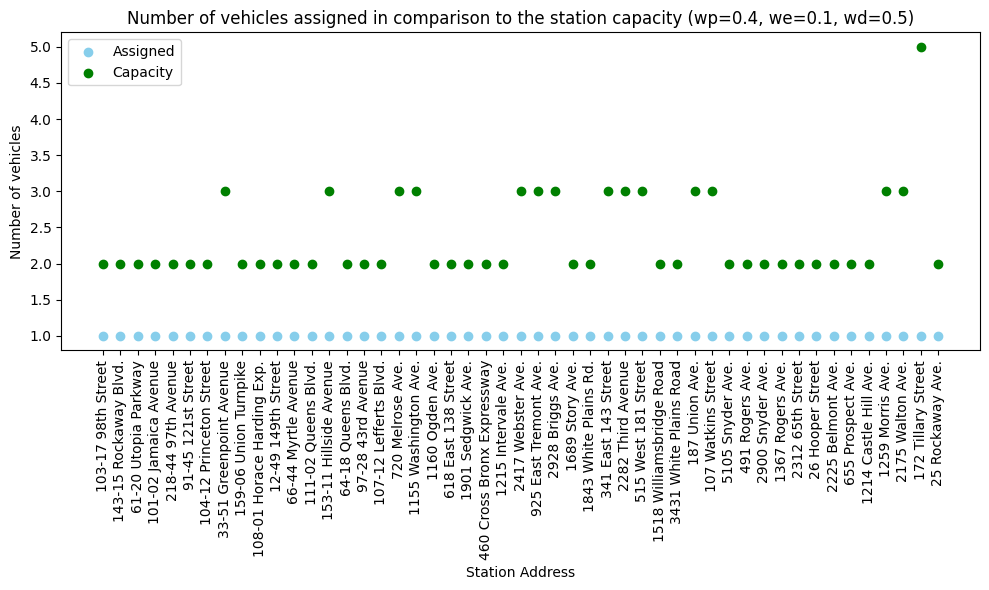

TOTAL DIFFERENCES: 66


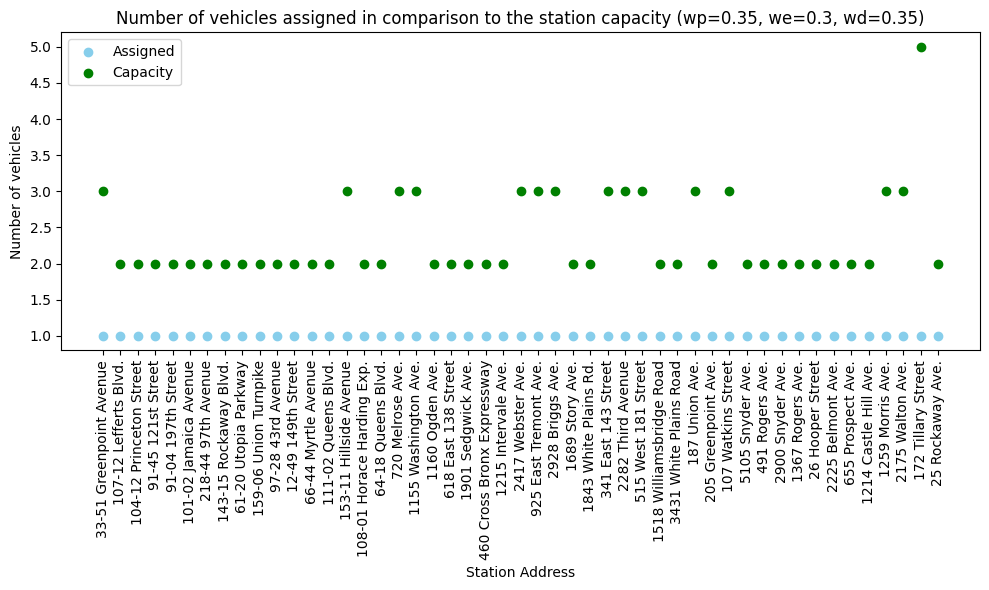

TOTAL DIFFERENCES: 66


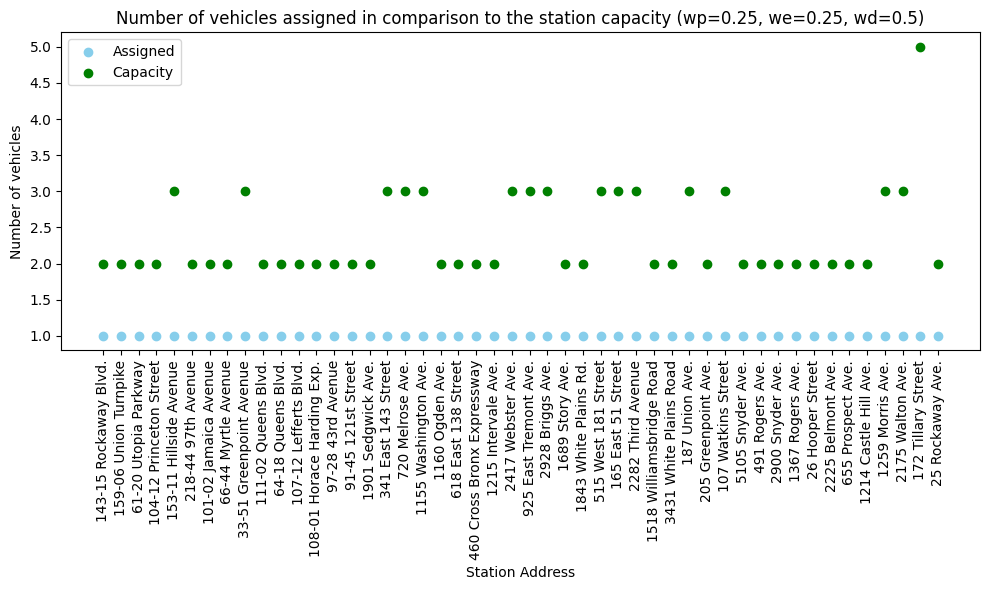

TOTAL DIFFERENCES: 66


In [111]:
differences(0.40, 0.10, 0.50, "first")
differences(0.35, 0.30, 0.35, "first")
differences(0.25, 0.25, 0.50, "first")